In [52]:
import numpy as np
import pandas as pd
import os
import glob
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [53]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import LorentzianModel, GaussianModel, SplineModel

In [54]:
#loading 6 peaks
folder_path = 'spectroscopy_data/peaks_6'
csv_files = glob.glob(os.path.join(folder_path, '*.CSV')) 
dataframes6peaks = []
i=0
for file in csv_files:
    i +=1
    df = pd.read_csv(file)
    dataframes6peaks.append(df)
    print(f"{i} Loaded {file}:")  # Display first few rows of each file


1 Loaded spectroscopy_data/peaks_6/6_ (10).CSV:
2 Loaded spectroscopy_data/peaks_6/6_ (1).CSV:
3 Loaded spectroscopy_data/peaks_6/6_ (7).CSV:
4 Loaded spectroscopy_data/peaks_6/6_ (6).CSV:
5 Loaded spectroscopy_data/peaks_6/6_ (5).CSV:
6 Loaded spectroscopy_data/peaks_6/CS-BB-22.CSV:
7 Loaded spectroscopy_data/peaks_6/CS-BB-23.CSV:
8 Loaded spectroscopy_data/peaks_6/6_ (9).CSV:
9 Loaded spectroscopy_data/peaks_6/6_ (8).CSV:
10 Loaded spectroscopy_data/peaks_6/6_ (4).CSV:
11 Loaded spectroscopy_data/peaks_6/6_ (3).CSV:
12 Loaded spectroscopy_data/peaks_6/6_ (2).CSV:


In [55]:
# gauss = GaussianModel(prefix='g_')
# pars = gauss.make_params(center=dict(value=947, min=946, max=951), amplitude=dict(value=-26, max=0), sigma=dict(value = 2.6))

# l1 = LorentzianModel(prefix='l1_')
# pars.update(l1.make_params(center=dict(value=947.2, min=947, max=947.5),
#                                sigma=dict(value=0.1, min=0),
#                                amplitude=dict(value=1, min=0)))

# l2 = LorentzianModel(prefix='l2_')
# pars.update(l2.make_params(center=dict(value=948, min=947.7, max=948.2),
#                                sigma=dict(value=0.05, min=0),
#                                amplitude=dict(value=0.01, min=0)))
# # l3 = LorentzianModel(prefix='l3_')
# # pars.update(l3.make_params(center=dict(value=949, min=948, max=949.2),
# #                                sigma=dict(value=0.1, min=0),
# #                                amplitude=dict(value=0.01, min=0)))
# # l4 = LorentzianModel(prefix='l4_')
# # pars.update(l4.make_params(center=dict(value=949, min=948, max=949.8),
# #                                sigma=dict(value=0.1, min=0),
# #                                amplitude=dict(value=0.01, min=0)))
# # l5 = LorentzianModel(prefix='l5_')
# # pars.update(l5.make_params(center=dict(value=949, min=948, max=949.8),
# #                                sigma=dict(value=0.1, min=0),
# #                                amplitude=dict(value=0.01, min=0)))
# # l6 = LorentzianModel(prefix='l6_')
# # pars.update(l6.make_params(center=dict(value=951.5, min=951, max=952),
# #                                sigma=dict(value=0.1, min=0),
#                             #    amplitude=dict(value=0.01, min=0)))


# # mod = gauss + l1 + l2+ l3+ l4+ l5+ l6 
# mod = gauss + l1 + l2



In [56]:
# init = mod.eval(pars, x=x)
# out = mod.fit(y, pars, x=x)

# print(out.fit_report(correl_mode='table'))


In [57]:

# fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
# axes[0].plot(x, y)
# axes[0].plot(x, init, '--', label='initial fit')
# axes[0].plot(x, out.best_fit, '-', label='best fit')
# axes[0].legend()

# comps = out.eval_components(x=x)
# axes[1].plot(x, y)
# # axes[1].plot(x, comps['l1_'], '--', label='L component 1')
# # axes[1].plot(x, comps['l2_'], '--', label='L component 2')
# # axes[1].plot(x, comps['l3_'], '--', label='l component 3')
# # axes[1].plot(x, comps['l4_'], '--', label='l component 4')
# # axes[1].plot(x, comps['l5_'], '--', label='Lorentz component 5')
# # axes[1].plot(x, comps['l6_'], '--', label='Lorentz component 6')
# axes[1].plot(x, comps['g_'], '--', label='Gaussian component')

# axes[1].legend()

# plt.show()

In [58]:
y = dataframes6peaks[4]['CH1[V]']*100
x = dataframes6peaks[4]['[s]']*1000

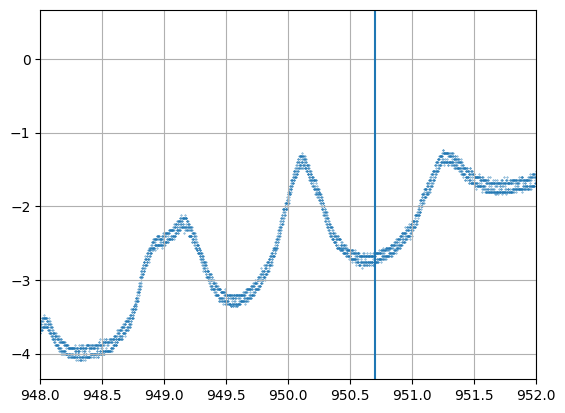

In [59]:
plt.scatter(x,y, s=0.1)
plt.xlim( 948,952)
plt.axvline(950.7)
plt.grid()

In [60]:
cutleft = (x-950).abs().argmin()
cutright = (x-951).abs().argmin()
min1 = y[cutleft: cutright].argmin()
indy = min1 + cutleft
print(x[indy])

950.5951


In [61]:
knot_xvals = np.array([940, 941, 942, 943, 944, 945,  946, 948.5, 949.5367, 950.5951, 952, 953, 954, 956, 958, 960, 962   ])

bkg = SplineModel(prefix='bkg_', xknots=knot_xvals)
params =bkg.guess(y, x)
peak1 = LorentzianModel(prefix='l1_')
params.update(peak1.make_params(center=dict(value=947.2, min=947, max=947.5),
                               sigma=dict(value=0.1, min=0),
                               amplitude=dict(value=1, min=0)))
peak2 = LorentzianModel(prefix='l2_')
params.update(peak2.make_params(center=dict(value=948, min=947.5, max=948.5),
                               sigma=dict(value=0.1, min=0),
                               amplitude=dict(value=1, min=0)))
peak3 = LorentzianModel(prefix='l3_')
params.update(peak3.make_params(center=dict(value=949, min=948.5, max=949.6),
                               sigma=dict(value=0.1, min=0),
                               amplitude=dict(value=1, min=0)))
# peak4 = LorentzianModel(prefix='l4_')
# params.update(peak4.make_params(center=dict(value=950.1, min=949.5, max=950.6),
#                                sigma=dict(value=0.1, min=0),
#                                amplitude=dict(value=1, min=0)))

name,value,initial value,min,max,vary,expression
bkg_s0,0.06666667,None,-inf,inf,True,
bkg_s1,-0.00666667,None,-inf,inf,True,
bkg_s2,-0.15333333,None,-inf,inf,True,
bkg_s3,-0.44000000,None,-inf,inf,True,
bkg_s4,-1.16000000,None,-inf,inf,True,
bkg_s5,-2.49333333,None,-inf,inf,True,
bkg_s6,-3.71333333,None,-inf,inf,True,
bkg_s7,-3.96666667,None,-inf,inf,True,
bkg_s8,-3.31333333,None,-inf,inf,True,
bkg_s9,-2.78666667,None,-inf,inf,True,


In [62]:
# model =   bkg + peak1 +peak2 + peak3 
model =   bkg 

init = model.eval(params, x=x)
out = model.fit(y, params, x=x)
print(out.fit_report(min_correl=0.3))

[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 20000
    # variables        = 26
    chi-square         = 927.785909
    reduced chi-square = 0.04644968
    Akaike info crit   = -61361.7310
    Bayesian info crit = -61156.2403
    R-squared          = 0.97841324
##  Warning: uncertainties could not be estimated:
    l1_amplitude:  at initial value
    l1_center:     at initial value
    l1_sigma:      at initial value
    l2_amplitude:  at initial value
    l2_center:     at initial value
    l2_sigma:      at initial value
    l3_amplitude:  at initial value
    l3_center:     at initial value
    l3_sigma:      at initial value
[[Variables]]
    bkg_s0:        0.05916340 (init = 0.06666667)
    bkg_s1:        0.03547994 (init = -0.006666667)
    bkg_s2:        0.04550509 (init = -0.1533333)
    bkg_s3:       -0.43072710 (init = -0.44)
    bkg_s4:       -0.91763450 (init = -1.16)

In [63]:
len(knot_xvals)

17

In [64]:
knot_yvals = np.array([o.value for o in out.params.values() if o.name.startswith('bkg')])
len(knot_yvals)

17

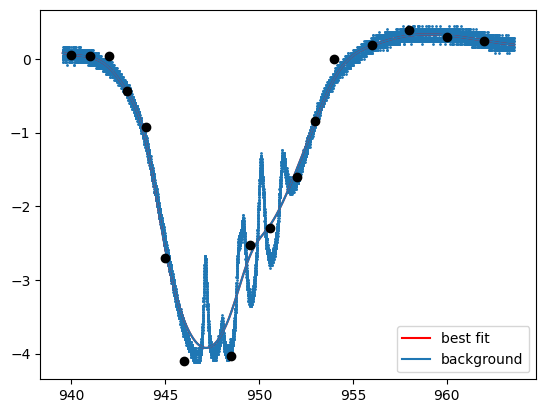

In [65]:
comps = out.eval_components()
plt.plot(x, out.best_fit, label='best fit', color= 'red')
plt.plot(x, comps['bkg_'], label='background')
plt.scatter(x,y, s=1)
# plt.plot(x, comps['l1_'], label='peak')
# plt.plot(x, comps['l2_'], label='peak')
# plt.plot(x, comps['l3_'], label='peak')
# plt.plot(x, comps['l4_'], label='peak')

plt.legend()

plt.plot(knot_xvals, knot_yvals, 'o', color='black', label='spline knots values')


In [66]:
ynew = y - comps['bkg_']
ynew *= 100

(946.0, 953.0)

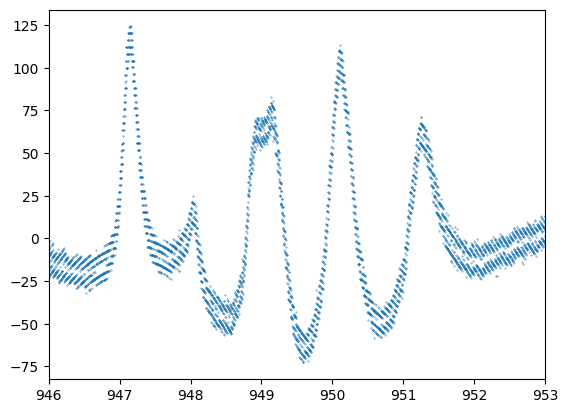

In [67]:
# plt.scatter(x,y,s=0.1)
# plt.plot(x, comps['bkg_'], label='background')
plt.scatter(x, ynew, s = 0.1)
plt.xlim(946, 953)


In [68]:
l1 = LorentzianModel(prefix='l1_')

params = l1.make_params(
    center = dict(value = 947), 
    sigma = 0.4,
    amplitude = 120
)

# l2 = LorentzianModel(prefix='l2_')

In [69]:
model  = l1

init = model.eval(params, x=x)
out = model.fit(ynew, params, x=x)
print(out.fit_report(min_correl=0.3))


[[Model]]
    Model(lorentzian, prefix='l1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 65
    # data points      = 20000
    # variables        = 3
    chi-square         = 7620177.98
    reduced chi-square = 381.066059
    Akaike info crit   = 118862.455
    Bayesian info crit = 118886.165
    R-squared          = 0.17867065
[[Variables]]
    l1_amplitude:  30.5748072 +/- 0.65566464 (2.14%) (init = 120)
    l1_center:     947.148439 +/- 0.00161315 (0.00%) (init = 947)
    l1_sigma:      0.07473703 +/- 0.00227453 (3.04%) (init = 0.4)
    l1_fwhm:       0.14947406 +/- 0.00454905 (3.04%) == '2.0000000*l1_sigma'
    l1_height:     130.220108 +/- 2.80373267 (2.15%) == '0.3183099*l1_amplitude/max(1e-15, l1_sigma)'
[[Correlations]] (unreported correlations are < 0.300)
    C(l1_amplitude, l1_sigma) = +0.7068


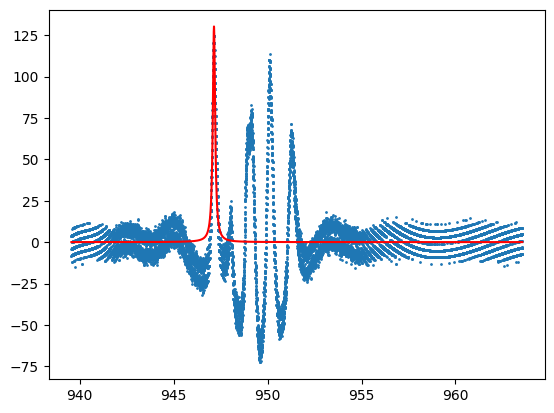

In [70]:

comps = out.eval_components()
plt.plot(x, out.best_fit, label='best fit', color= 'red')
# plt.plot(x, comps['l1_'], label='background')
plt.scatter(x,ynew,s=1)